# Digit Recognizer

In [2]:
import tensorflow as tf
import numpy as np
import os

In [9]:
import csv
from pandas import read_csv

train_file = os.path.join("dataset", "train.csv")

labels = []
imgs = np.array([])

with open(train_file) as f:
    df = read_csv(f)

(42000, 785)


In [10]:
labels = df.iloc[:, 0]

imgs = df.iloc[:, 1:]

imgs = np.array(imgs)

In [12]:
imgs = imgs.reshape(imgs.shape[0], 28,28,1)
print(imgs.shape)

(42000, 28, 28, 1)


In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(16, (3,3), activation = "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005), metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 16)               

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.995): # Experiment with changing this value
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [27]:
mycallback = myCallback()

history = model.fit(imgs, labels, epochs = 50, callbacks=[mycallback])

Epoch 1/50
1313/1313 [==============================] - 21s 15ms/step - loss: 0.9360 - accuracy: 0.7630
Epoch 2/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.1863 - accuracy: 0.9521
Epoch 3/50
1313/1313 [==============================] - 23s 17ms/step - loss: 0.1173 - accuracy: 0.9690
Epoch 4/50
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0866 - accuracy: 0.9764
Epoch 5/50
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0718 - accuracy: 0.9801
Epoch 6/50
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0604 - accuracy: 0.9828
Epoch 7/50
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0534 - accuracy: 0.9842
Epoch 8/50
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0493 - accuracy: 0.9862
Epoch 9/50
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0441 - accuracy: 0.9873
Epoch 10/50
1313/1313 [==============================] - 26s 20m

In [30]:
with open(os.path.join("dataset", "test.csv")) as f:
    test = read_csv(f)
    
test = np.array(test)
test = test.reshape(test.shape[0], 28,28,1)

In [31]:
result = model.predict(test)

875/875 [==============================] - 4s 5ms/step


In [46]:
import pickle


In [50]:
with open("model.pkl", "wb") as file:
    pickle.dump(history.history, file)

In [35]:
result = np.array(result)
temp = np.argmax(result, axis=1)

In [39]:
with open("out.csv", "w", newline='') as out:
    writer = csv.writer(out)
    writer.writerow(["ImageId", "Label"])
    
    for i, lab in enumerate(temp):
        writer.writerow([i+1, lab])

{'loss': [0.9359662532806396, 0.1862781047821045, 0.11729923635721207, 0.08655934035778046, 0.07178862392902374, 0.06035059690475464, 0.053399186581373215, 0.04927007853984833, 0.04407511278986931, 0.03990244120359421, 0.03771742805838585, 0.03591956943273544, 0.03346418961882591, 0.03136548399925232, 0.031745076179504395, 0.02955825999379158, 0.02769334428012371, 0.027225088328123093, 0.025332078337669373, 0.023866230621933937, 0.024590134620666504, 0.02315717376768589, 0.023795420303940773, 0.022331004962325096, 0.021067200228571892, 0.020132936537265778, 0.017905671149492264, 0.020875144749879837, 0.018676141276955605, 0.01803932711482048, 0.017804980278015137, 0.020507676526904106, 0.017009329050779343, 0.017924677580595016, 0.015499400906264782, 0.019658014178276062, 0.01861744374036789, 0.019591188058257103, 0.01786714605987072, 0.017316076904535294, 0.015906840562820435, 0.015948623418807983, 0.018444422632455826, 0.016656743362545967, 0.015970980748534203, 0.014232725836336613,

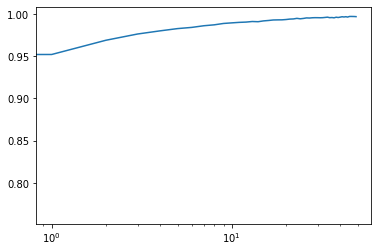

In [45]:
import matplotlib.pyplot as plt

plt.semilogx(list(range(50)), history.history["accuracy"])
plt.axis([0,50, 0.95, 1])